# 1. Import Library & Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

In [ ]:
df1 = pd.read_csv('/content/BTC-USD.csv')
df2 = pd.read_csv('/content/ETH-USD.csv')
df3 = pd.read_csv('/content/XRP-USD.csv')

In [ ]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,10198.599609,11046.700195,9694.650391,10975.599609,10975.599609,6783119872
1,2017-12-02,10978.299805,11320.200195,10905.099609,11074.599609,11074.599609,5138500096
2,2017-12-03,11082.700195,11858.700195,10862.000000,11323.200195,11323.200195,6608309760
3,2017-12-04,11315.400391,11657.200195,11081.799805,11657.200195,11657.200195,6132409856
4,2017-12-05,11685.700195,12032.000000,11604.599609,11916.700195,11916.700195,6895260160


In [ ]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,445.209015,472.609009,428.312012,466.540009,466.540009,1247879936
1,2017-12-02,466.851013,476.239014,456.653015,463.449005,463.449005,943649984
2,2017-12-03,463.704987,482.813995,451.851990,465.852997,465.852997,990556992
3,2017-12-04,466.053986,474.777008,453.312012,470.204010,470.204010,1005550016
4,2017-12-05,470.294006,473.558014,457.660004,463.281006,463.281006,1216720000


In [ ]:
df3.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,0.250352,0.258828,0.239438,0.255699,0.255699,182992000
1,2017-12-02,0.255656,0.259218,0.250756,0.255492,0.255492,118250000
2,2017-12-03,0.255530,0.263072,0.247391,0.252558,0.252558,134710000
3,2017-12-04,0.252919,0.255362,0.247160,0.253571,0.253571,104650000
4,2017-12-05,0.253598,0.253988,0.245234,0.246101,0.246101,174591008


# 2. Merging three Data into one Dataframe

In [ ]:
df1 = df1.rename(columns={
    'Open': 'BTC-OPEN',
    'High': 'BTC-HIGH',
    'Low': 'BTC-LOW',
    'Close': 'BTC-CLOSE',
    'Volume': 'BTC-VOLUME',
    'Adj Close': 'BTC-ADJ CLOSE'
})

df2 = df2.rename(columns={
    'Open': 'ETH-OPEN',
    'High': 'ETH-HIGH',
    'Low': 'ETH-LOW',
    'Close': 'ETH-CLOSE',
    'Volume': 'ETH-VOLUME',
    'Adj Close': 'ETH-ADJ CLOSE'
})

df3 = df3.rename(columns={
    'Open': 'XRP-OPEN',
    'High': 'XRP-HIGH',
    'Low': 'XRP-LOW',
    'Close': 'XRP-CLOSE',
    'Volume': 'XRP-VOLUME',
    'Adj Close': 'XRP-ADJ CLOSE'
})

df = df1.merge(df2, on='Date').merge(df3, on='Date')
df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)
df.head()

,Date,BTC-OPEN,BTC-HIGH,BTC-LOW,BTC-CLOSE,BTC-ADJ CLOSE,BTC-VOLUME,ETH-OPEN,ETH-HIGH,ETH-LOW,ETH-CLOSE,ETH-ADJ CLOSE,ETH-VOLUME,XRP-OPEN,XRP-HIGH,XRP-LOW,XRP-CLOSE,XRP-ADJ CLOSE,XRP-VOLUME
0,2017-12-01,10198.599609,11046.700195,9694.650391,10975.599609,10975.599609,6783119872,445.209015,472.609009,428.312012,466.540009,466.540009,1247879936,0.250352,0.258828,0.239438,0.255699,0.255699,182992000
1,2017-12-02,10978.299805,11320.200195,10905.099609,11074.599609,11074.599609,5138500096,466.851013,476.239014,456.653015,463.449005,463.449005,943649984,0.255656,0.259218,0.250756,0.255492,0.255492,118250000
2,2017-12-03,11082.700195,11858.700195,10862.000000,11323.200195,11323.200195,6608309760,463.704987,482.813995,451.851990,465.852997,465.852997,990556992,0.255530,0.263072,0.247391,0.252558,0.252558,134710000
3,2017-12-04,11315.400391,11657.200195,11081.799805,11657.200195,11657.200195,6132409856,466.053986,474.777008,453.312012,470.204010,470.204010,1005550016,0.252919,0.255362,0.247160,0.253571,0.253571,104650000
4,2017-12-05,11685.700195,12032.000000,11604.599609,11916.700195,11916.700195,6895260160,470.294006,473.558014,457.660004,463.281006,463.281006,1216720000,0.253598,0.253988,0.245234,0.246101,0.246101,174591008


In [ ]:
df = df.drop(columns=['BTC-ADJ CLOSE', 'ETH-ADJ CLOSE', 'XRP-ADJ CLOSE'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2130 entries, 0 to 2129
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2130 non-null   datetime64[ns]
 1   BTC-OPEN       2130 non-null   float64       
 2   BTC-HIGH       2130 non-null   float64       
 3   BTC-LOW        2130 non-null   float64       
 4   BTC-CLOSE      2130 non-null   float64       
 5   BTC-ADJ CLOSE  2130 non-null   float64       
 6   BTC-VOLUME     2130 non-null   int64         
 7   ETH-OPEN       2130 non-null   float64       
 8   ETH-HIGH       2130 non-null   float64       
 9   ETH-LOW        2130 non-null   float64       
 10  ETH-CLOSE      2130 non-null   float64       
 11  ETH-ADJ CLOSE  2130 non-null   float64       
 12  ETH-VOLUME     2130 non-null   int64         
 13  XRP-OPEN       2130 non-null   float64       
 14  XRP-HIGH       2130 non-null   float64       
 15  XRP-LOW        2130 n

# 3. Statistic Descriptive & Clear Outliers

In [ ]:
df_out_IQR.describe()

,BTC-OPEN,BTC-HIGH,BTC-LOW,BTC-CLOSE,BTC-ADJ CLOSE,BTC-VOLUME,ETH-OPEN,ETH-HIGH,ETH-LOW,ETH-CLOSE,ETH-ADJ CLOSE,ETH-VOLUME,XRP-OPEN,XRP-HIGH,XRP-LOW,XRP-CLOSE,XRP-ADJ CLOSE,XRP-VOLUME
count,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2.013000e+03,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2.013000e+03,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2.013000e+03
mean,20149.570760,20597.318035,19687.872137,20172.132735,20172.132735,2.347340e+10,1171.248263,1202.616597,1137.374282,1171.855555,1171.855555,1.112462e+10,0.480068,0.496286,0.462949,0.480264,0.480264,2.086425e+09
std,15365.010066,15729.704246,14977.185350,15377.110587,15377.110587,1.480034e+10,1125.525174,1155.721534,1092.105794,1125.549322,1125.549322,8.044357e+09,0.250781,0.262362,0.238444,0.250902,0.250902,2.836378e+09
min,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,2.923670e+09,84.279694,85.342743,82.829887,84.308296,84.308296,9.436500e+08,0.140524,0.146911,0.115093,0.139635,0.139635,1.046500e+08
25%,8091.830078,8245.509766,7878.709961,8094.319824,8094.319824,1.165638e+10,218.899002,224.261002,212.654007,218.970596,218.970596,4.664134e+09,0.298039,0.305553,0.289935,0.298165,0.298165,8.396177e+08
50%,13075.242188,13651.516602,12885.747070,13271.285156,13271.285156,2.175686e+10,662.109009,691.442017,628.749390,669.924011,669.924011,9.274845e+09,0.405315,0.416910,0.392328,0.405921,0.405921,1.348477e+09
75%,29199.859375,29521.513672,28803.585938,29210.689453,29210.689453,3.263785e+10,1821.192139,1847.095337,1787.536377,1820.478027,1820.478027,1.619137e+10,0.603769,0.624724,0.576690,0.604849,0.604849,2.299595e+09
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,7.706990e+10,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,4.010863e+10,1.290701,1.349174,1.240957,1.291435,1.291435,3.695518e+10


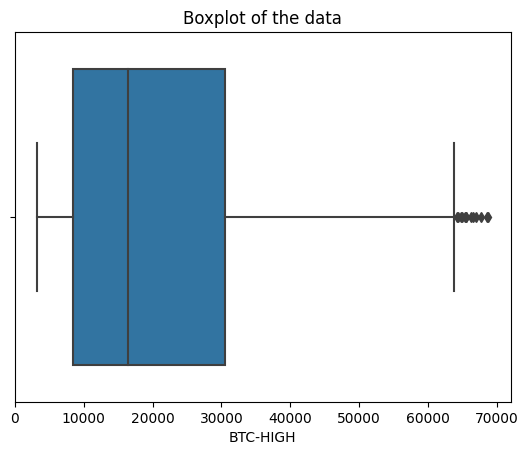

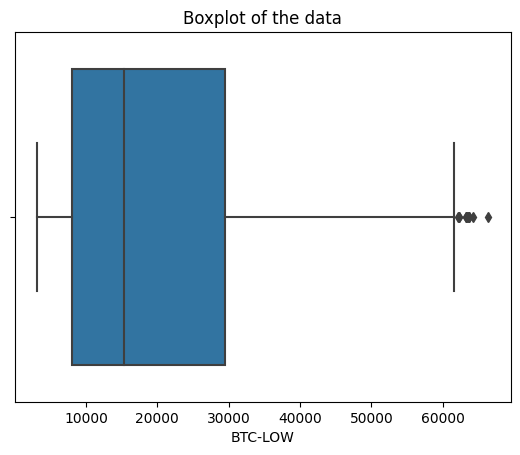

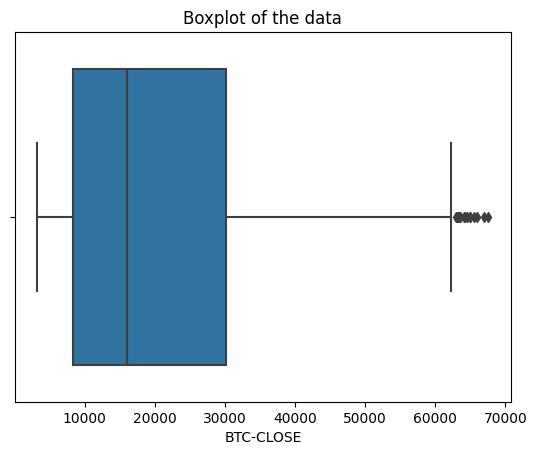

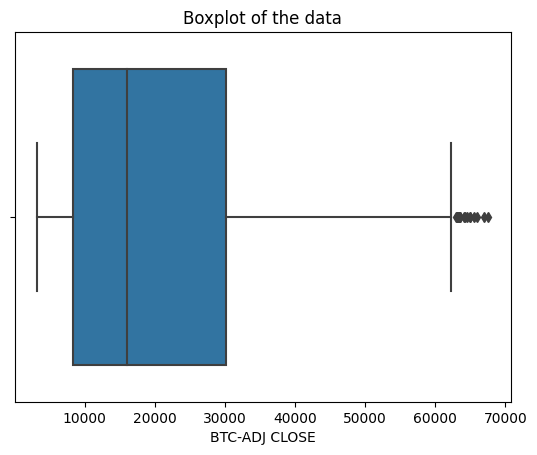

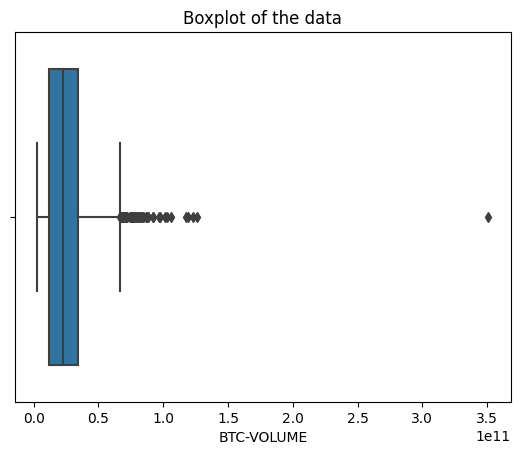

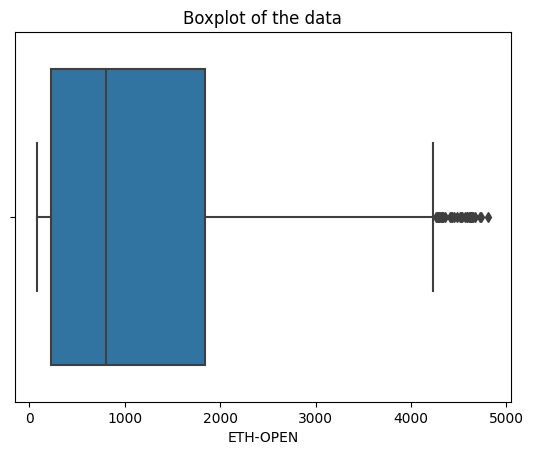

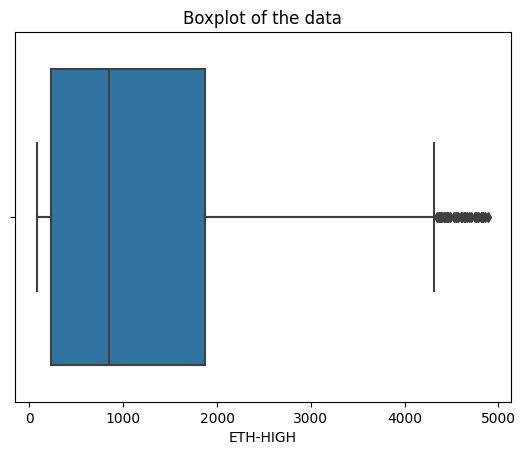

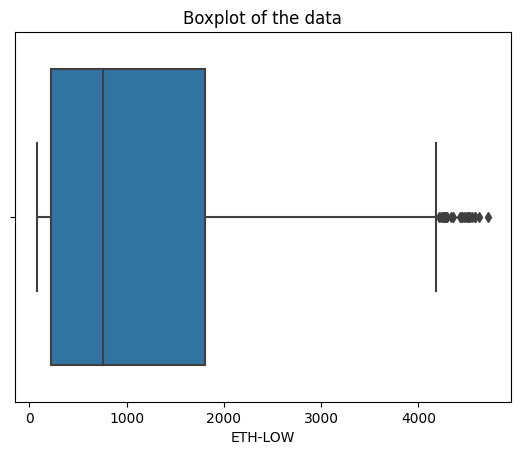

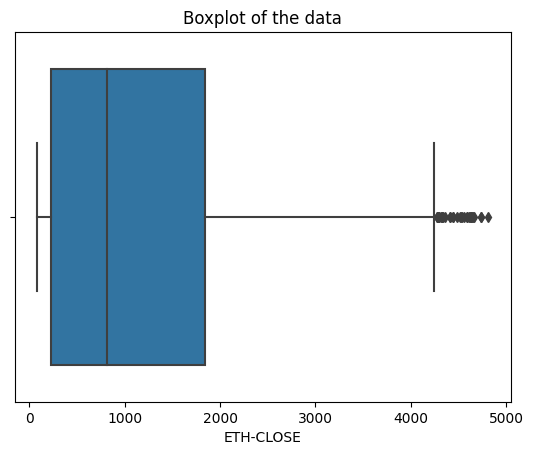

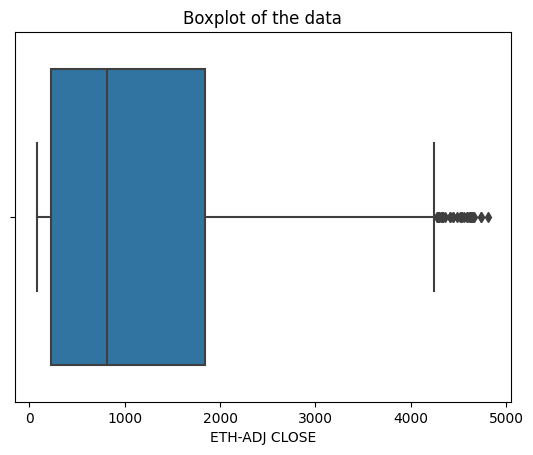

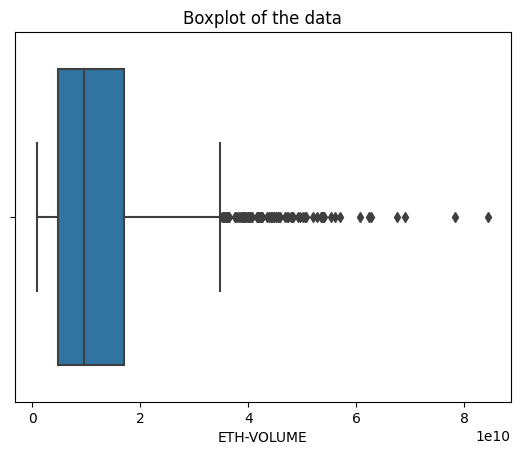

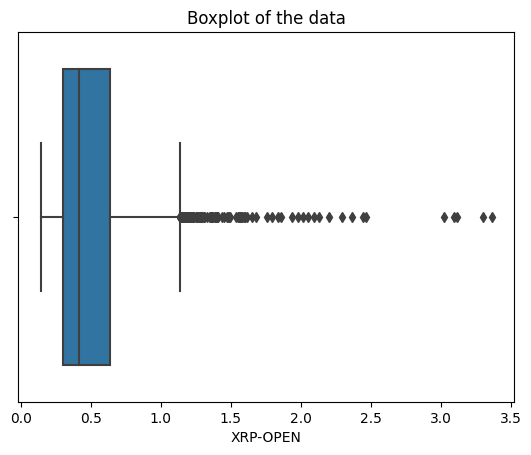

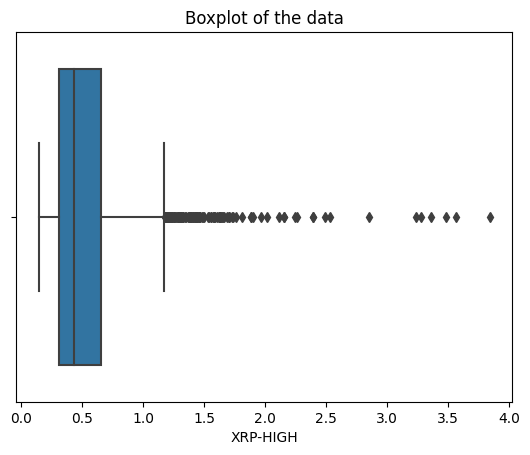

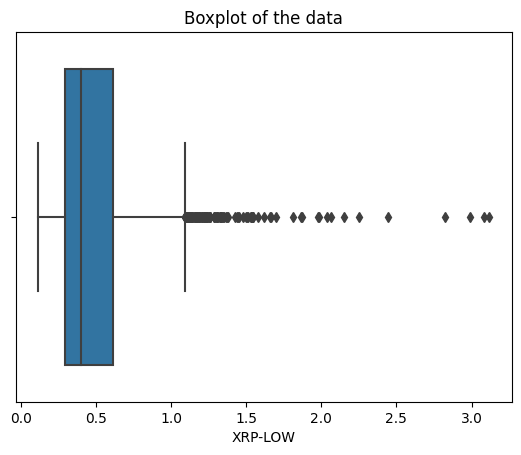

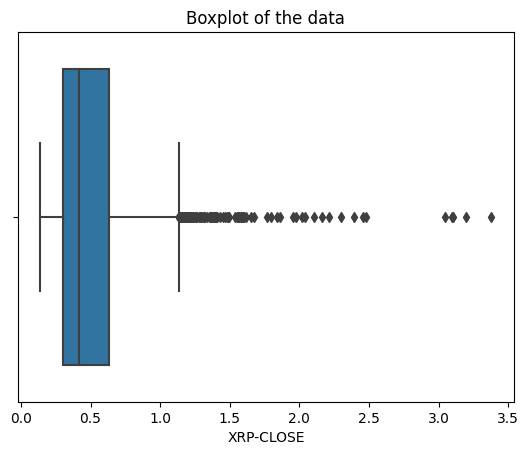

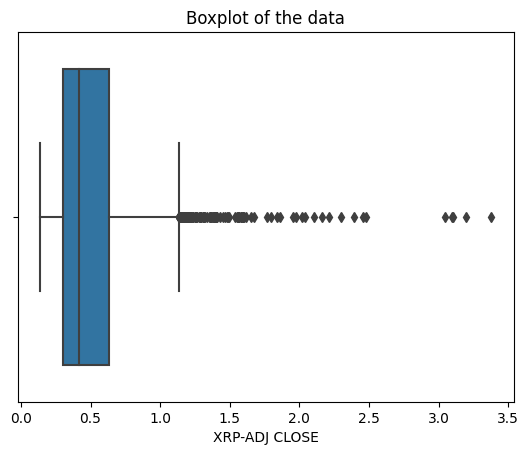

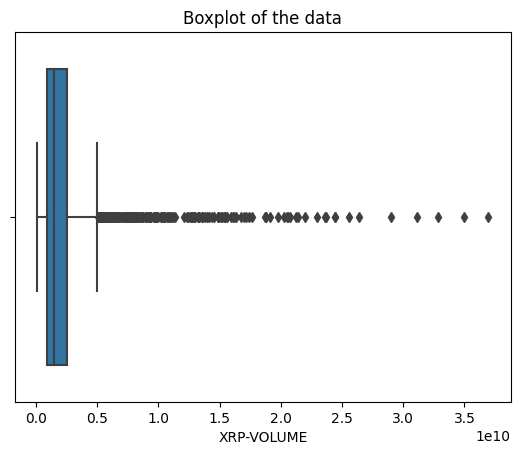

In [ ]:
for i in df.columns[1:]:
    sns.boxplot(x=df[i])
    plt.title('Boxplot of the data')
    plt.show()

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

scale = 2
lower_lim = Q1 - scale*IQR
upper_lim = Q3 + scale*IQR

lower_outliers = (df[df.columns[1:16]] < lower_lim)
upper_outliers = (df[df.columns[1:16]] > upper_lim)

<ipython-input-10-30f6f5bdbe9b>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_outliers = (df[df.columns[1:16]] < lower_lim)
<ipython-input-10-30f6f5bdbe9b>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  upper_outliers = (df[df.columns[1:16]] > upper_lim)


In [ ]:
df[df.columns[1:16]][(lower_outliers | upper_outliers)].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2130 entries, 2017-12-01 to 2023-09-30
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BTC-HIGH       0 non-null      float64
 1   BTC-LOW        0 non-null      float64
 2   BTC-CLOSE      0 non-null      float64
 3   BTC-ADJ CLOSE  0 non-null      float64
 4   BTC-VOLUME     27 non-null     float64
 5   ETH-OPEN       0 non-null      float64
 6   ETH-HIGH       0 non-null      float64
 7   ETH-LOW        0 non-null      float64
 8   ETH-CLOSE      0 non-null      float64
 9   ETH-ADJ CLOSE  0 non-null      float64
 10  ETH-VOLUME     51 non-null     float64
 11  XRP-OPEN       66 non-null     float64
 12  XRP-HIGH       72 non-null     float64
 13  XRP-LOW        55 non-null     float64
 14  XRP-CLOSE      66 non-null     float64
dtypes: float64(15)
memory usage: 266.2 KB


In [ ]:
num_cols = list(df.columns[1:16])
df_out_IQR = df[~((df[num_cols] < (Q1 - 2 * IQR)) |(df[num_cols] > (Q3 + 2 * IQR))).any(axis=1)]
df_out_IQR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2013 entries, 2017-12-01 to 2023-09-30
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BTC-OPEN       2013 non-null   float64
 1   BTC-HIGH       2013 non-null   float64
 2   BTC-LOW        2013 non-null   float64
 3   BTC-CLOSE      2013 non-null   float64
 4   BTC-ADJ CLOSE  2013 non-null   float64
 5   BTC-VOLUME     2013 non-null   int64  
 6   ETH-OPEN       2013 non-null   float64
 7   ETH-HIGH       2013 non-null   float64
 8   ETH-LOW        2013 non-null   float64
 9   ETH-CLOSE      2013 non-null   float64
 10  ETH-ADJ CLOSE  2013 non-null   float64
 11  ETH-VOLUME     2013 non-null   int64  
 12  XRP-OPEN       2013 non-null   float64
 13  XRP-HIGH       2013 non-null   float64
 14  XRP-LOW        2013 non-null   float64
 15  XRP-CLOSE      2013 non-null   float64
 16  XRP-ADJ CLOSE  2013 non-null   float64
 17  XRP-VOLUME     2013 non-null   int

<ipython-input-12-de52ac92eb92>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out_IQR = df[~((df[num_cols] < (Q1 - 2 * IQR)) |(df[num_cols] > (Q3 + 2 * IQR))).any(axis=1)]
<ipython-input-12-de52ac92eb92>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out_IQR = df[~((df[num_cols] < (Q1 - 2 * IQR)) |(df[num_cols] > (Q3 + 2 * IQR))).any(axis=1)]


# 4. Correlation Check

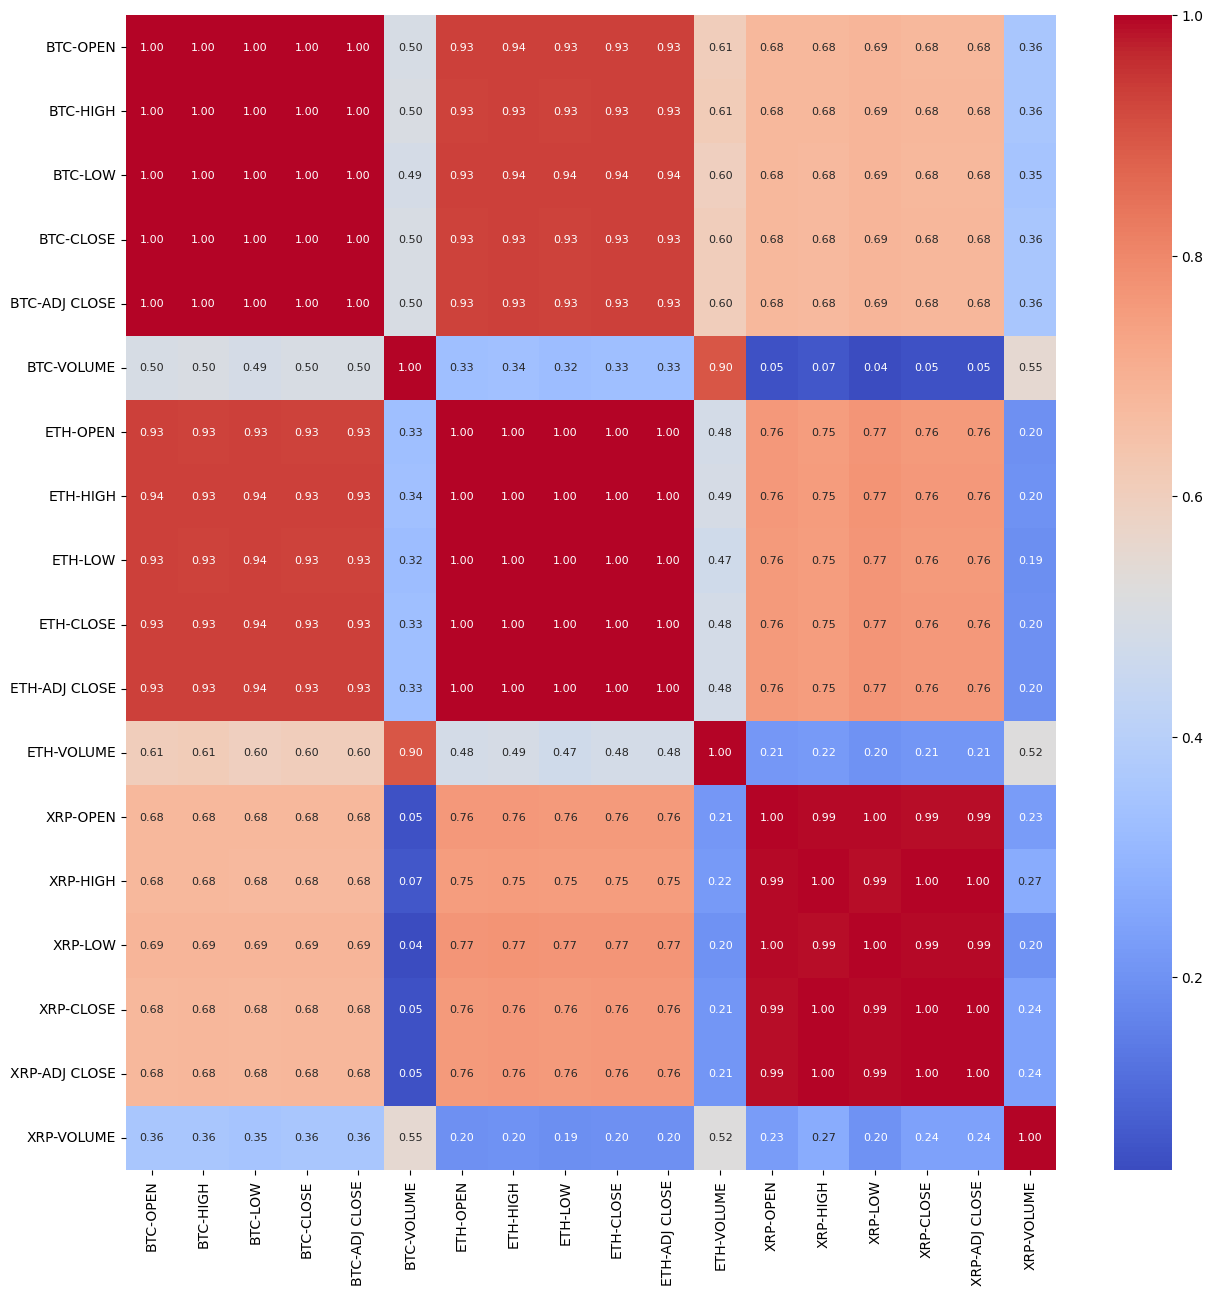

In [ ]:
numeric_df = df_out_IQR.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.show()


Correlation Between BTC & ETH: 0.92


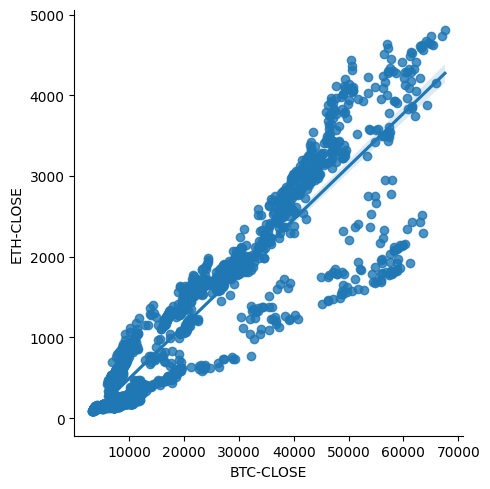

In [ ]:
correlation = df['BTC-CLOSE'].corr(df['ETH-CLOSE'])
print(f"\nCorrelation Between BTC & ETH: {correlation:.2f}")
sns.lmplot(x='BTC-CLOSE',y='ETH-CLOSE', data = df)


Korelasi antara BTC dan XRP: 0.54


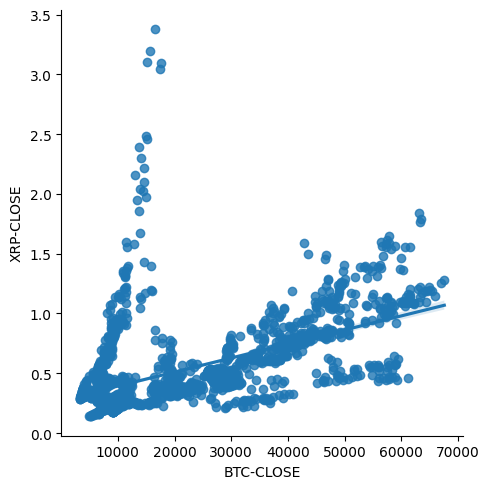

In [ ]:
correlation = df['BTC-CLOSE'].corr(df['XRP-CLOSE'])
print(f"\nKorelasi antara BTC dan XRP: {correlation:.2f}")
sns.lmplot(x='BTC-CLOSE',y='XRP-CLOSE', data = df)

In [ ]:
btc_volatility = df['BTC-CLOSE'].std()
eth_volatility = df['ETH-CLOSE'].std()
xrp_volatility = df['XRP-CLOSE'].std()

print("Bitcoin Volatility:", btc_volatility)
print("Ethereum Volatility:", eth_volatility)
print("XRP Volatility:", xrp_volatility)

Bitcoin Volatility: 15916.232757277248
Ethereum Volatility: 1132.3842168097156
XRP Volatility: 0.34310661307415574


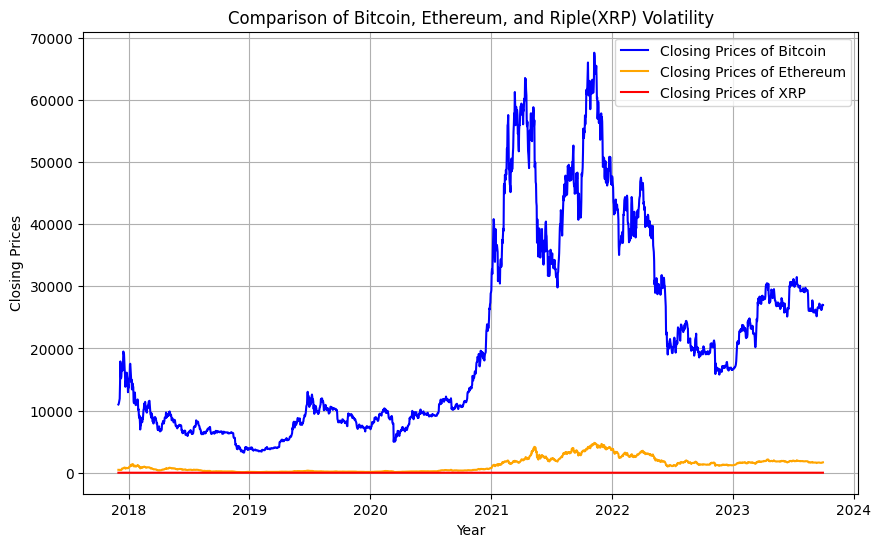

In [ ]:
import matplotlib.pyplot as plt

df = df1.merge(df2, on='Date').merge(df3, on='Date')
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['BTC-CLOSE'], label='Closing Prices of Bitcoin', color='blue')
plt.plot(df['Date'], df['ETH-CLOSE'], label='Closing Prices of Ethereum', color='orange')
plt.plot(df['Date'], df['XRP-CLOSE'], label='Closing Prices of XRP', color='red')
plt.xlabel('Year')
plt.ylabel('Closing Prices')
plt.title('Comparison of Bitcoin, Ethereum, and Riple(XRP) Volatility')
plt.legend()
plt.grid(True)
plt.show()

# 5. Model Testing
## A. OLS Regression

In [ ]:
X = df['BTC-CLOSE']
y = df['ETH-CLOSE']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print("\nLinear Regression Model:")
print(model.summary())


Linear Regression Model:
                            OLS Regression Results                            
Dep. Variable:              ETH-CLOSE   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 1.232e+04
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        09:48:09   Log-Likelihood:                -15960.
No. Observations:                2130   AIC:                         3.192e+04
Df Residuals:                    2128   BIC:                         3.194e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -166.6984     

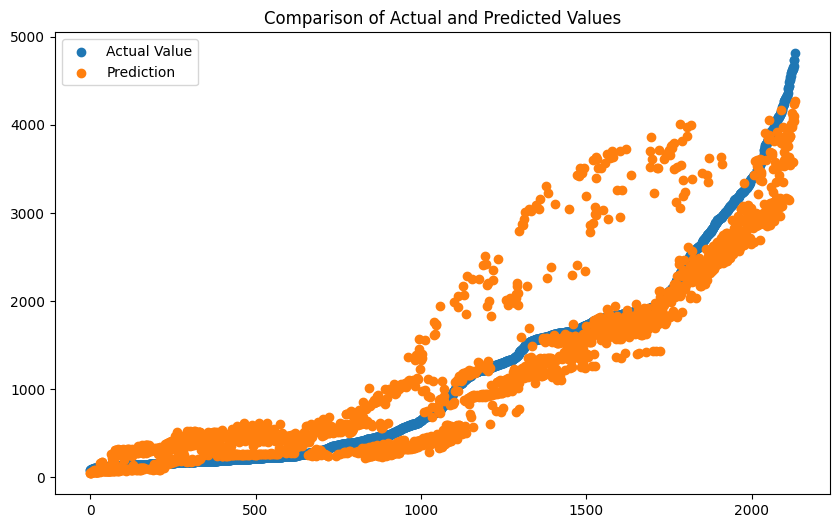

In [ ]:
predictions = model.predict(X)
plt.figure(figsize=(10, 6))

y_sorted = np.sort(y.tolist())
y_sorted_index = np.argsort(y.tolist())

predictions_sorted = predictions[y_sorted_index]

plt.scatter(np.arange(0,len(y_sorted)), y_sorted, label='Actual Value')
plt.scatter(np.arange(0,len(y_sorted)), predictions_sorted, label='Prediction')
plt.title("Comparison of Actual and Predicted Values")
plt.legend()

In [ ]:
X = df['BTC-CLOSE']
y = df['XRP-CLOSE']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print("\nLinear Regression Model:")
print(model.summary())


Linear Regression Model:
                            OLS Regression Results                            
Dep. Variable:              XRP-CLOSE   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     898.0
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          6.58e-165
Time:                        09:46:15   Log-Likelihood:                -368.40
No. Observations:                2130   AIC:                             740.8
Df Residuals:                    2128   BIC:                             752.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2754     

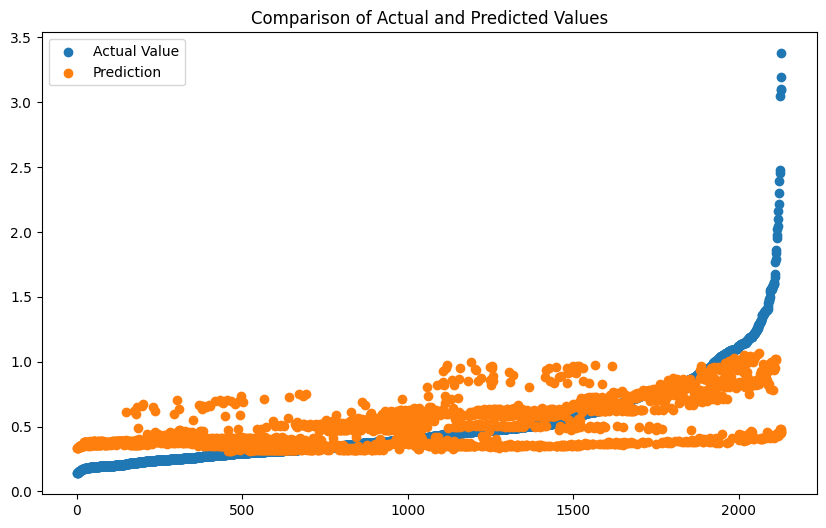

In [ ]:
predictions = model.predict(X)
plt.figure(figsize=(10, 6))

y_sorted = np.sort(y.tolist())
y_sorted_index = np.argsort(y.tolist())

predictions_sorted = predictions[y_sorted_index]

plt.scatter(np.arange(0,len(y_sorted)), y_sorted, label='Actual Value')
plt.scatter(np.arange(0,len(y_sorted)), predictions_sorted, label='Prediction')
plt.title("Comparison of Actual and Predicted Values")
plt.legend()

## B. Linear Regressin

In [ ]:
X = df['BTC-CLOSE']
y = df['ETH-CLOSE']
k = 5

kf = KFold(n_splits=k, shuffle=True, random_state=42)

model = LinearRegression()

mse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train.values.reshape(-1, 1), y_train)

    y_pred = model.predict(X_test.values.reshape(-1, 1))

    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

avg_mse = sum(mse_scores) / len(mse_scores)
print("Average MSE:", avg_mse)

Average MSE: 189614.46641010983


In [ ]:
x = df[['BTC-CLOSE']]
y = df['ETH-CLOSE']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) #seed

print("X_train : ", x_train.shape)
print("X_test : ", x_test.shape)
print("Y_train : ", y_train.shape)
print("Y_test : ", y_test.shape)

X_train :  (1597, 1)
X_test :  (533, 1)
Y_train :  (1597,)
Y_test :  (533,)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)


print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f"R-squared: {r2}")

MAE: 293.55663915936526
MSE: 185520.19026608946
RMSE: 430.7205477639643
R-squared: 0.8626010826085047


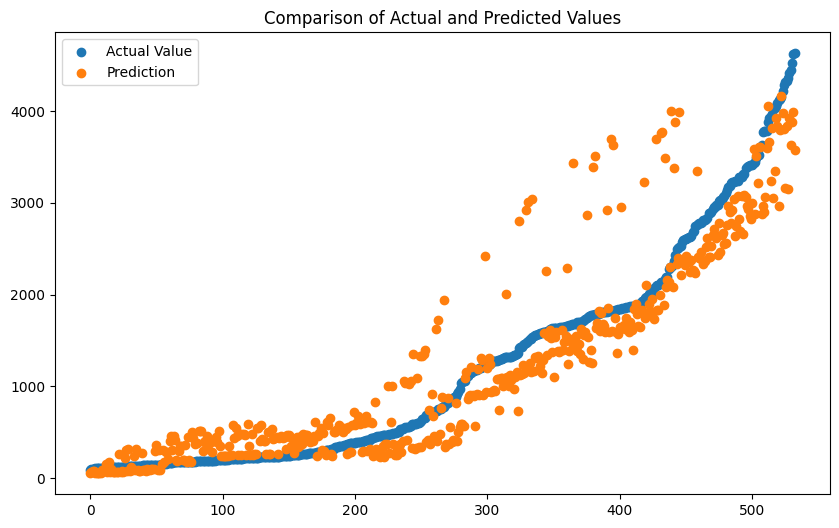

In [ ]:
predictions = model.predict(x_test)

plt.figure(figsize=(10, 6))

y_sorted = np.sort(y_test.tolist())
y_sorted_index = np.argsort(y_test.tolist())

predictions_sorted = predictions[y_sorted_index]

plt.scatter(np.arange(0,len(y_sorted)), y_sorted, label='Actual Value')
plt.scatter(np.arange(0,len(y_sorted)), predictions_sorted, label='Prediction')
plt.title("Comparison of Actual and Predicted Values")
plt.legend()

## C. Decision Tree Regressor

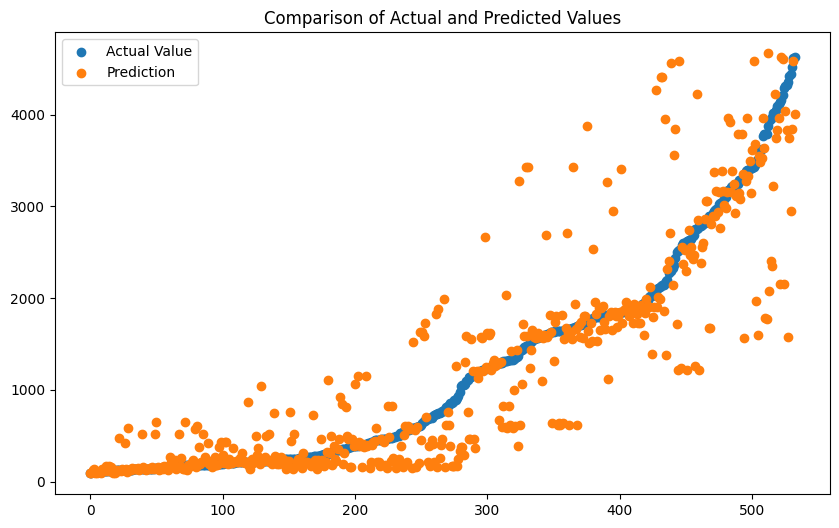

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

predictions = model.predict(x_test)

plt.figure(figsize=(10, 6))

y_sorted = np.sort(y_test.tolist())
y_sorted_index = np.argsort(y_test.tolist())

predictions_sorted = predictions[y_sorted_index]

plt.scatter(np.arange(0,len(y_sorted)), y_sorted, label='Actual Value')
plt.scatter(np.arange(0,len(y_sorted)), predictions_sorted, label='Prediction')
plt.title("Comparison of Actual and Predicted Values")
plt.legend()

In [ ]:
r2 = r2_score(y_test, y_pred)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f"R-squared: {r2}")

MAE: 319.5441879174484
MSE: 328885.92898795864
RMSE: 573.4857705191635
R-squared: 0.7564223574618574


## D. Random Forest Regressor

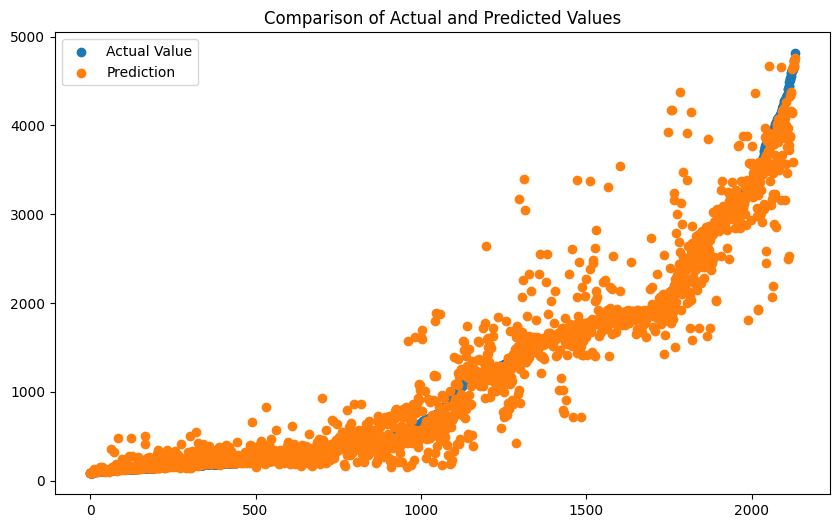

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

predictions = model.predict(x)

plt.figure(figsize=(10, 6))

y_sorted = np.sort(y.tolist())
y_sorted_index = np.argsort(y.tolist())

predictions_sorted = predictions[y_sorted_index]

plt.scatter(np.arange(0,len(y_sorted)), y_sorted, label='Actual Value')
plt.scatter(np.arange(0,len(y_sorted)), predictions_sorted, label='Prediction')
plt.title("Comparison of Actual and Predicted Values")
plt.legend()

In [ ]:
r2 = r2_score(y_test, y_pred)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f"R-squared: {r2}")

MAE: 288.43401849082545
MSE: 244299.23689752424
RMSE: 494.2663622962059
R-squared: 0.819068476476095


# 6. Chart Graph

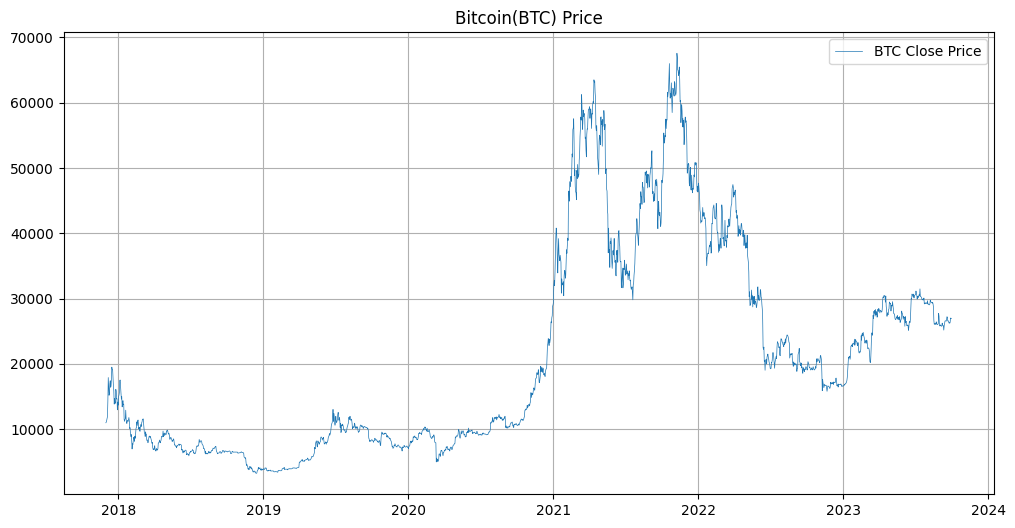

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['BTC-CLOSE'], label='BTC Close Price', linewidth=0.5)
plt.title('Bitcoin(BTC) Price')
plt.legend()
plt.grid(True)
plt.show()

# 7. Differentiation

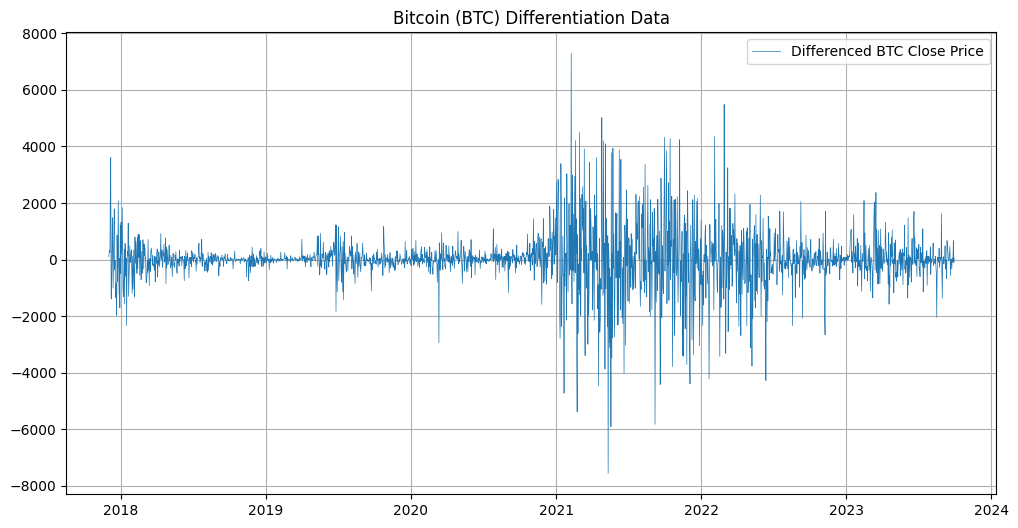

In [ ]:
df['BTC-Differenced'] = df['BTC-CLOSE'].diff().dropna()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['BTC-Differenced'], label='Differenced BTC Close Price', linewidth=0.5)
plt.title('Bitcoin (BTC) Differentiation Data')
plt.legend()
plt.grid(True)
plt.show()

# 8. Daily Return Comparison

In [ ]:
df = df1.merge(df2, on='Date').merge(df3, on='Date')
df['Date'] = pd.to_datetime(df['Date'])

df['BTC Daily Return'] = df['BTC-CLOSE'].pct_change()
df['ETH Daily Return'] = df['ETH-CLOSE'].pct_change()
df['XRP Daily Return'] = df['XRP-CLOSE'].pct_change()
print("\nDaily Price Changes:")
print(df[['Date', 'BTC Daily Return', 'ETH Daily Return','XRP Daily Return']])


Daily Price Changes:
           Date  BTC Daily Return  ETH Daily Return  XRP Daily Return
0    2017-12-01               NaN               NaN               NaN
1    2017-12-02          0.009020         -0.006625         -0.000810
2    2017-12-03          0.022448          0.005187         -0.011484
3    2017-12-04          0.029497          0.009340          0.004011
4    2017-12-05          0.022261         -0.014723         -0.029459
...         ...               ...               ...               ...
2125 2023-09-26         -0.003089          0.003207         -0.007425
2126 2023-09-27          0.005167          0.002557         -0.004208
2127 2023-09-28          0.025380          0.034674          0.019872
2128 2023-09-29         -0.004064          0.009112          0.023932
2129 2023-09-30          0.002088          0.001929         -0.012102

[2130 rows x 4 columns]



Correlation between BTC and ETH: 0.78


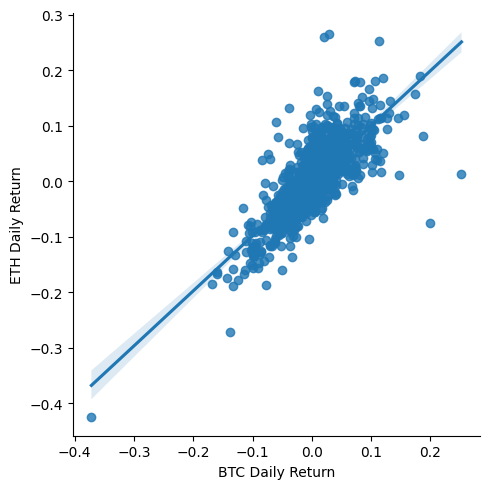

In [ ]:
correlation = df['BTC Daily Return'].corr(df['ETH Daily Return'])
print(f"\nCorrelation between BTC and ETH: {correlation:.2f}")
sns.lmplot(x='BTC Daily Return',y='ETH Daily Return', data = df)


Correlation between BTC and XRP: 0.51


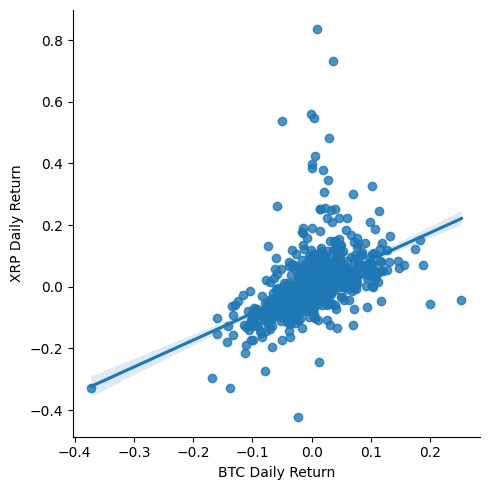

In [ ]:
correlation = df['BTC Daily Return'].corr(df['XRP Daily Return'])
print(f"\nCorrelation between BTC and XRP: {correlation:.2f}")
sns.lmplot(x='BTC Daily Return',y='XRP Daily Return', data = df)

# 9. Export Data

In [ ]:
from google.colab import files
df.to_csv('main_data.csv', index=False)
files.download('main_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>